
<div style="text-align: center; color: white; background-color: #559cff; font-weight: bold; padding: 20px" >
 <p style="font-size: 40px"> Final Project - Programming for Data Science 📚</p>
 <p style="font-size: 30px"> <u>Question 1:</u>  What makes song popular? 📈</p>

</div>


---

## Member Information 👬
| Name              | ID       |
|-------------------|----------|
| Nguyen Khanh Nhan | 21127657         |
| Tran Dai Nien     | 21127664 |

## Table of contents 📑
1. [Question](#1-question) <br> 
    1.1 [The purpose of the question](#11-the-purpose-of-the-question)<br>
    1.2 [How to solve the question](#12-how-to-solve-the-question)
2. [Solution](#2-solution) <br>
    2.1 [Pre-processing data](#21-pre-processing-data)<br>
    2.2 [Data analysis](#22-data-analysis)<br>
    2.3 [Answer the question](#23-answer-the-question)<br>
---

## 1. Question

What makes song popular?

### 1.1 The purpose of the question

 There are numerous factors that can contribute to the creation of a good song that attracts millions of listeners. As producers or singers, if we are aware of these factors, they can be incredibly helpful in improving our approach to composing a song and the methods we use to do so.

### 1.2 How to solve the question

Analyse the factors(attributes) of the songs which has the following properties:

1. Factors(Attributes) from the most popular song of each year

2. Factors(Attributes) from the phases when the changing rate of streams was remarkable

3. Factors(Attributes) of bests songs from multiple charts(Apple, Deezer, Spotify)

4. Factors(Attributes) of songs that appear the most in playlist of different platforms(Spotify, Deezer or Apple)

Find the value of attribute of the best songs that we have found which has the best distribution among all.

## 2. Solution

### 2.0 Preparation

**📚 Import libraries**

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**📊 Get data**

In [160]:
df = pd.read_csv('./data/processed_spotify-2023.csv', encoding='ISO-8859-1')
df.head().T

,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147.0,48.0,113.0,100.0,50.0
streams,141381703.0,133716286.0,140003974.0,800840817.0,303236322.0
in_apple_playlists,43,48,94,116,84


### 2.1 Pre-processing data

### 2.2 Data analysis

#### Find insights from data by visualizing and analysing

<i>**Get number of songs released in each years**</i>

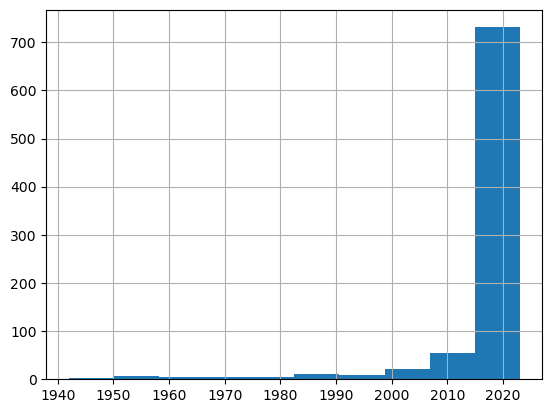

In [161]:
df['released_year'].hist();

🤔 In 21th century, people tend to hear music more. We can see the number of songs after 2000 increase significantly, indicating that music more and more comes closer to people's life and improve their life in positive ways. 

<i>**Song with highest Streams**<i/>

In [162]:
highest_streams_song = df.sort_values(by='streams', ascending=False).iloc[:1].T
highest_streams_song

,52
track_name,Blinding Lights
artist(s)_name,The Weeknd
artist_count,1
released_year,2019
released_month,11
released_day,29
in_spotify_playlists,43899
in_spotify_charts,69.0
streams,3703895074.0
in_apple_playlists,672


<i>**Most popular songs from 1930 to 2023**</i>

In [163]:
released_years = sorted(list(df['released_year'].value_counts().index))
best_songs = {}

for year in released_years:
  songs = df[df['released_year'] == year]
  songs = songs.sort_values(by=['streams'], ascending=False)
  best_song = songs.iloc[0]
  best_songs[year] = best_song

best_songs_df = pd.DataFrame(best_songs)

best_songs_df.T[['track_name', 'streams']].sort_index(ascending=False)[:10]

,track_name,streams
2023,Flowers,1316855716.0
2022,As It Was,2513188493.0
2021,STAY (with Justin Bieber),2665343922.0
2020,Heat Waves,2557975762.0
2019,Blinding Lights,3703895074.0
2018,Someone You Loved,2887241814.0
2017,Shape of You,3562543890.0
2016,One Dance,2713922350.0
2015,Love Yourself,2123309722.0
2014,Thinking Out Loud,2280566092.0


<i>**Most popular songs of each year and their corresponding streams**</i>

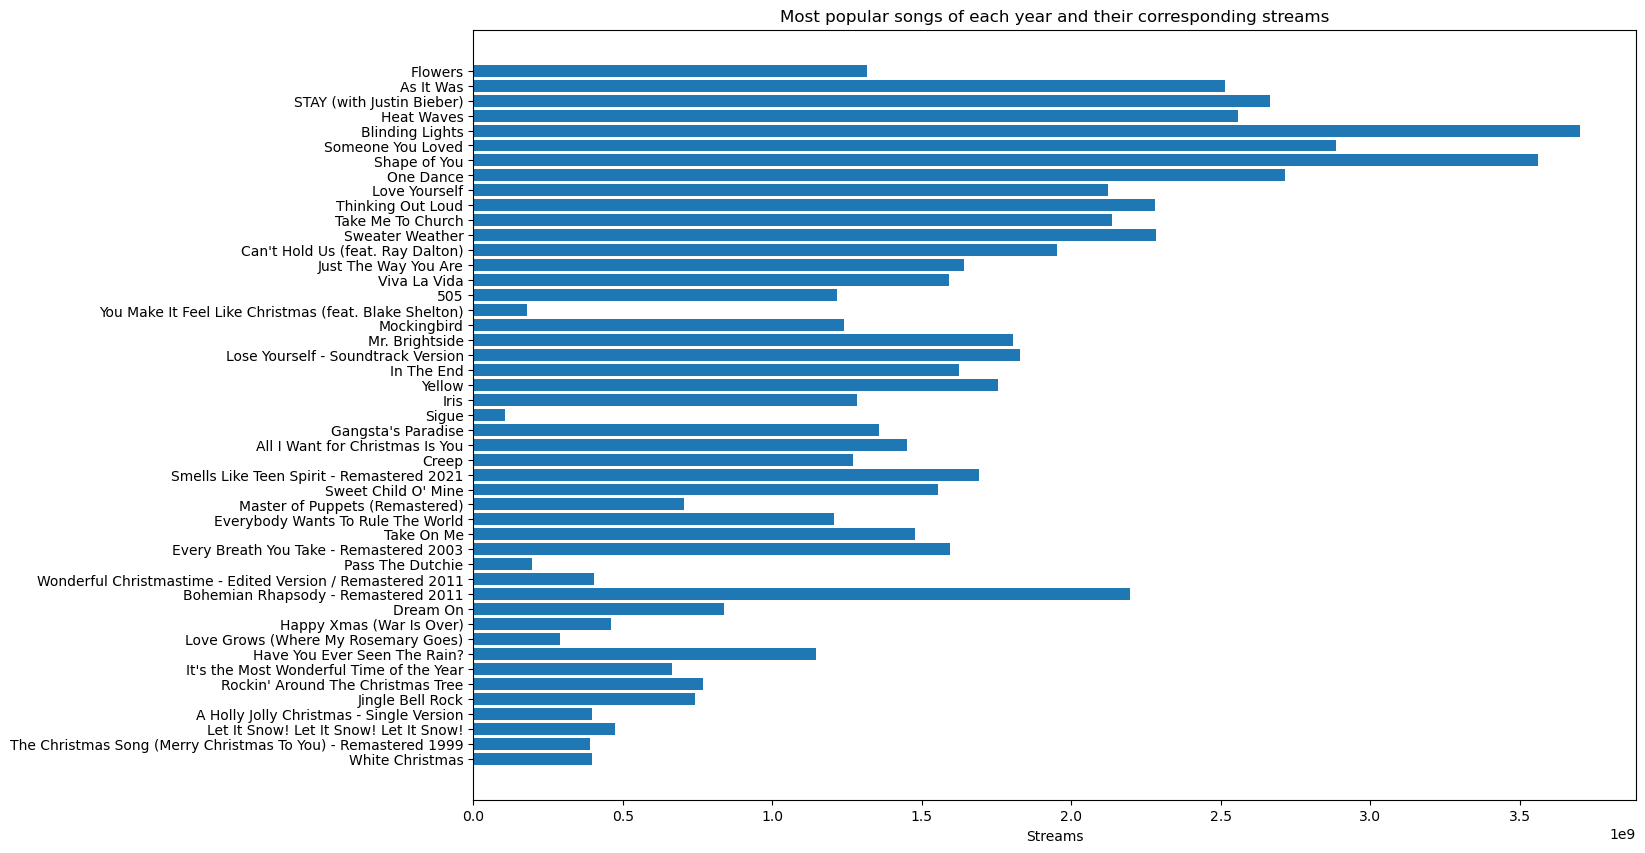

In [164]:
best_songs_name, best_songs_streams = best_songs_df.T['track_name'], best_songs_df.T['streams']
plt.figure(figsize=(15, 10))
plt.title('Most popular songs of each year and their corresponding streams')
plt.xlabel('Streams')
plt.barh(best_songs_name, best_songs_streams);

- Lowest/highest streams and corresponding year

In [165]:
best_songs_streams[best_songs_streams == best_songs_streams.values.min()]

1996    106933107.0
Name: streams, dtype: object

In [166]:
best_songs_streams[best_songs_streams == best_songs_streams.values.max()]

2019    3703895074.0
Name: streams, dtype: object

- Significant high stream songs

In [167]:
best_songs_df.T.sort_values(by='streams', ascending=False)[:3][['track_name', 'streams']]

,track_name,streams
2019,Blinding Lights,3703895074.0
2017,Shape of You,3562543890.0
2018,Someone You Loved,2887241814.0


- Noticeable low stream songs

In [168]:
best_songs_df.T.sort_values(by='streams')[:3][['track_name', 'streams']]

,track_name,streams
1996,Sigue,106933107.0
2005,You Make It Feel Like Christmas (feat. Blake S...,180577478.0
1982,Pass The Dutchie,195918494.0


- 📝 Comment:
  - The best songs in some years have the streams that are **very high** compare to the remaining
    1. Blinding Lights - 3703895074.0
    2. Shape of You - 3562543890.0
    3. Someone You Loved - 2887241814.0
  - Some best songs have the **lowest streams**
    1. Sigue - 106933107.0
    2. You Make It Feel Like Christmas - 180577478.0
    3. Pass The Dutchie	- 195918494.0

- ✅ Choose 3 songs which has the **highest streams of respected year**

In [169]:
highest_streams_respected_year_songs = best_songs_df.T.sort_values(by='streams', ascending=False)[:3]
highest_streams_respected_year_songs.T

,2019,2017,2018
track_name,Blinding Lights,Shape of You,Someone You Loved
artist(s)_name,The Weeknd,Ed Sheeran,Lewis Capaldi
artist_count,1,1,1
released_year,2019,2017,2018
released_month,11,1,11
released_day,29,6,8
in_spotify_playlists,43899,32181,17836
in_spotify_charts,69.0,10.0,53.0
streams,3703895074.0,3562543890.0,2887241814.0
in_apple_playlists,672,33,440


<i>**The changing rate of streams of most popular songs in each year**</i>

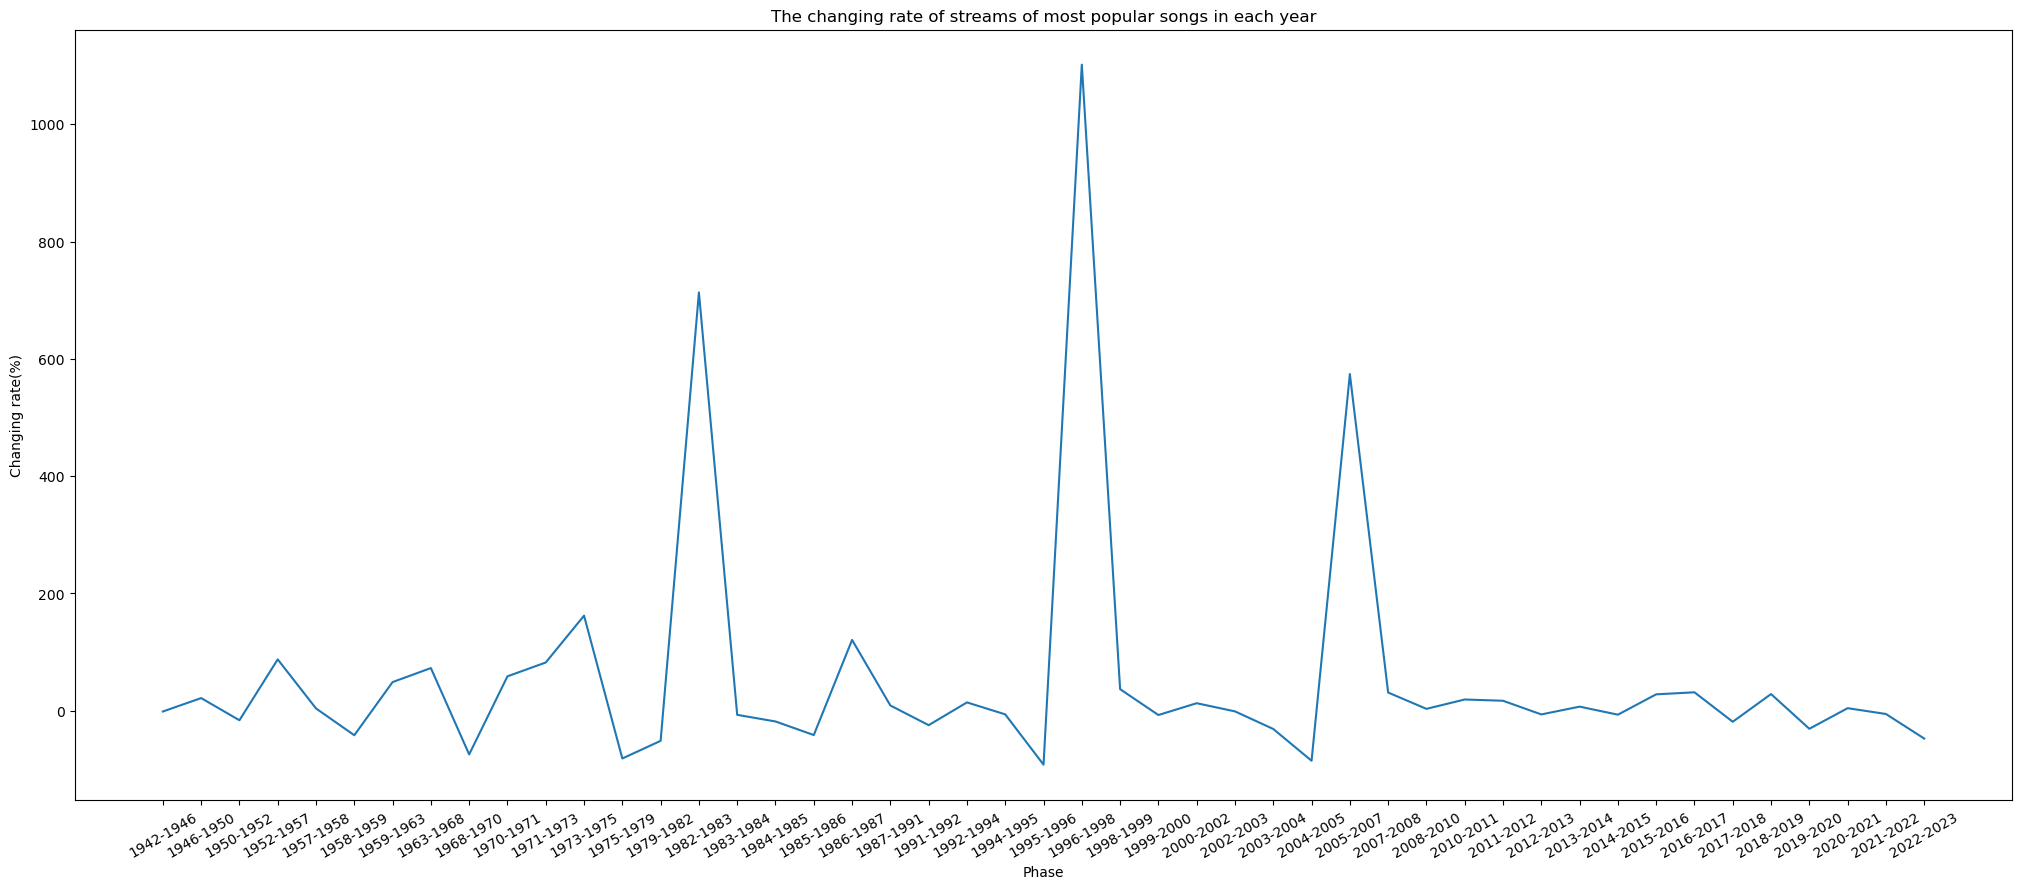

In [170]:
first = True
last_stream, last_year = None, None
changing_rate_df = {}

for year, stream in best_songs_streams.items():
  if first:
    first = False
    last_stream = stream
    last_year = year
    continue
  changing_rate_df[str(last_year) + '-' + str(year)] = (stream - last_stream) / last_stream * 100
  
  last_stream = stream
  last_year = year

changing_rate_df

plt.figure(figsize=(25, 10))
plt.xticks(rotation=30)
plt.ylabel('Changing rate(%)')
plt.xlabel('Phase')
plt.title('The changing rate of streams of most popular songs in each year')
plt.plot(changing_rate_df.keys(), changing_rate_df.values());

- Remarkable Phases and their respective changing rate

In [171]:
sorted(changing_rate_df.items(), key = lambda x: x[1], reverse=True)[:3]

[('1996-1998', 1101.6321643024924),
 ('1982-1983', 713.2314129568595),
 ('2005-2007', 574.0157872843921)]

- 📝 Comments:
  
  - There 3 noticeable phases where the changing rate changed significantly: **1982-1983, 1997-1998 and 2005-2007**
    1. In 1982-1983: 1138.345%
    2. In 1997-1998: 713.23%
    3. In 2005-2007: 574.01%


- ✅ Choose the songs in **1983, 1998, 2007** because these songs make the significant change

In [172]:
significant_changing_rate_songs = best_songs_df[[1983, 1998, 2007]]
significant_changing_rate_songs

,1983,1998,2007
track_name,Every Breath You Take - Remastered 2003,Iris,505
artist(s)_name,The Police,The Goo Goo Dolls,Arctic Monkeys
artist_count,1,1,1
released_year,1983,1998,2007
released_month,1,3,4
released_day,6,31,20
in_spotify_playlists,22439,13101,13985
in_spotify_charts,19.0,9.0,25.0
streams,1593270737.0,1284942608.0,1217120710.0
in_apple_playlists,211,137,30


<i>**The average streams of each years**</i>

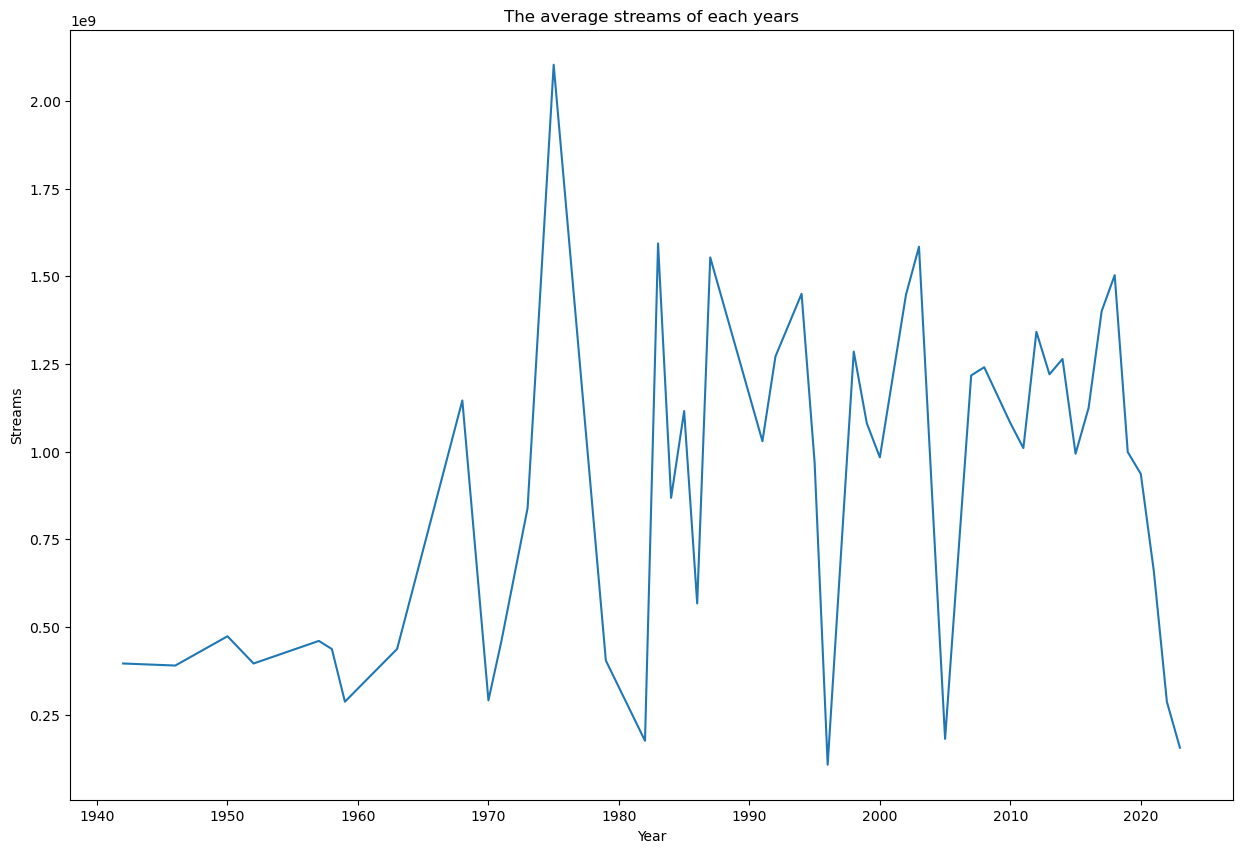

In [173]:
avg_stream_df = df[['released_year', 'streams']].groupby(by='released_year').mean()

plt.figure(figsize=(15, 10))
plt.title('The average streams of each years')
plt.xlabel('Year')
plt.ylabel('Streams')
plt.plot(avg_stream_df.index, avg_stream_df.values);

In [174]:
avg_stream_df['streams'].idxmax(), avg_stream_df['streams'].max()

(1975, 2103052676.0)

In [175]:
avg_stream_df['streams'].idxmin(), avg_stream_df['streams'].min()

(1996, 106933107.0)

- We can see that the **highest average streams** take place in 1975 but when we see it clearly, we know that in 1975, there are only **2 songs**: Riptide and Bohemian Rhapsody - Remastered 2011

In [176]:
df[df['released_year'] == 1975]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
74,Riptide,Vance Joy,1,1975,1,1,31123,55.0,2.009095e+09,300,...,102,C#,Major,48,50,73,43,0,15,4
636,Bohemian Rhapsody - Remastered 2011,Queen,1,1975,10,31,40112,3.0,2.197011e+09,321,...,71,C,Minor,41,23,40,27,0,30,5


- 📝 Comments

  - The chart tend to go up(some year it went down remarkably). Therefore, some factors may affect these changing. First is number of songs released in that year(fewer songs may make the average streams higher,...)
  - The **highest** average streams is 2103052676.0 in 1975
  
  - The **lowest** average streams is 90598517.0 in 1930

- 📝 In average streams chart, we can take it into account when we first get start with the data. However, for further analysis, we won't take this because this average metrics may affect by multiple factors(outliers, noise,...)

<i>**Best songs in spotify charts**</i>

In [177]:
def top_10_songs_in_chart(name):
  return df[(df['released_year'] == 2023) & df[name] != 0].sort_values(by=name)

spotify_best_songs = top_10_songs_in_chart('in_spotify_charts')

spotify_best_songs[['track_name']][:5]

,track_name
210,Hummingbird (Metro Boomin & James Blake)
231,Mejor Que Yo
343,VIBE (feat. Jimin of BTS)
205,Snow On The Beach (feat. More Lana Del Rey)
307,Heaven


- ✅ Top 3 best songs from Spotify Chart

In [178]:
top_spotify_best_songs = spotify_best_songs[:3]
top_spotify_best_songs.T

,210,231,343
track_name,Hummingbird (Metro Boomin & James Blake),Mejor Que Yo,VIBE (feat. Jimin of BTS)
artist(s)_name,"James Blake, Metro Boomin","Mambo Kingz, DJ Luian, Anuel Aa","TAEYANG, Jimin"
artist_count,2,3,2
released_year,2023,2023,2023
released_month,6,5,1
released_day,2,4,13
in_spotify_playlists,277,675,415
in_spotify_charts,1.0,1.0,2.0
streams,39666245.0,50847624.0,152850295.0
in_apple_playlists,1,9,15


<i>**Best songs on Apple charts**</i>

In [179]:
apple_best_songs = top_10_songs_in_chart('in_apple_charts')
apple_best_songs[['track_name']][:5]

,track_name
339,I'm Not Here To Make Friends
274,SORRY NOT SORRY
130,"Gol Bolinha, Gol Quadrado 2"
305,Private Landing (feat. Justin Bieber & Future)
226,Danger (Spider) (Offset & JID)


- ✅ Top 3 best songs from Apple Chart

In [180]:
top_apple_best_songs = apple_best_songs[:3]
top_apple_best_songs.T

,339,274,130
track_name,I'm Not Here To Make Friends,SORRY NOT SORRY,"Gol Bolinha, Gol Quadrado 2"
artist(s)_name,"Sam Smith, Calvin Harris, Jessie Reyez","Tyler, The Creator","Mc Pedrinho, DJ 900"
artist_count,3,2,2
released_year,2023,2023,2023
released_month,1,3,6
released_day,27,31,1
in_spotify_playlists,1890,709,293
in_spotify_charts,0.0,0.0,8.0
streams,103787664.0,58473276.0,11956641.0
in_apple_playlists,86,8,5


<i>**Best songs on deezer chart**</i>

In [181]:
deezer_best_songs = top_10_songs_in_chart('in_deezer_charts')
deezer_best_songs[['track_name']][:5]

,track_name
343,VIBE (feat. Jimin of BTS)
63,Overdrive
104,Mine (Taylor's Version)
53,Moonlight
110,LUNA


- ✅ Top 3 best songs from Deezer chart

In [182]:
top_deezer_best_songs = deezer_best_songs[:3]
top_deezer_best_songs.T

,343,63,104
track_name,VIBE (feat. Jimin of BTS),Overdrive,Mine (Taylor's Version)
artist(s)_name,"TAEYANG, Jimin",Post Malone,Taylor Swift
artist_count,2,1,1
released_year,2023,2023,2023
released_month,1,7,7
released_day,13,14,7
in_spotify_playlists,415,410,99
in_spotify_charts,2.0,36.0,15.0
streams,152850295.0,14780425.0,36912123.0
in_apple_playlists,15,36,21


<i>**Best songs on shazam charts**</i>

In [183]:
shazam_best_songs = top_10_songs_in_chart('in_shazam_charts')
shazam_best_songs[['track_name']][:5]

,track_name
231,Mejor Que Yo
178,Better Than Revenge (Taylor's Version)
210,Hummingbird (Metro Boomin & James Blake)
277,I Know - PR1SVX Edit
202,Las Morras


- ✅ Top 3 songs from Shazam best songs

In [184]:
top_shazam_best_songs = shazam_best_songs[:3]
top_shazam_best_songs.T

,231,178,210
track_name,Mejor Que Yo,Better Than Revenge (Taylor's Version),Hummingbird (Metro Boomin & James Blake)
artist(s)_name,"Mambo Kingz, DJ Luian, Anuel Aa",Taylor Swift,"James Blake, Metro Boomin"
artist_count,3,1,2
released_year,2023,2023,2023
released_month,5,7,6
released_day,4,7,2
in_spotify_playlists,675,86,277
in_spotify_charts,1.0,11.0,1.0
streams,50847624.0,30343206.0,39666245.0
in_apple_playlists,9,3,1


- Top songs from multiple charts and their corresponding streams

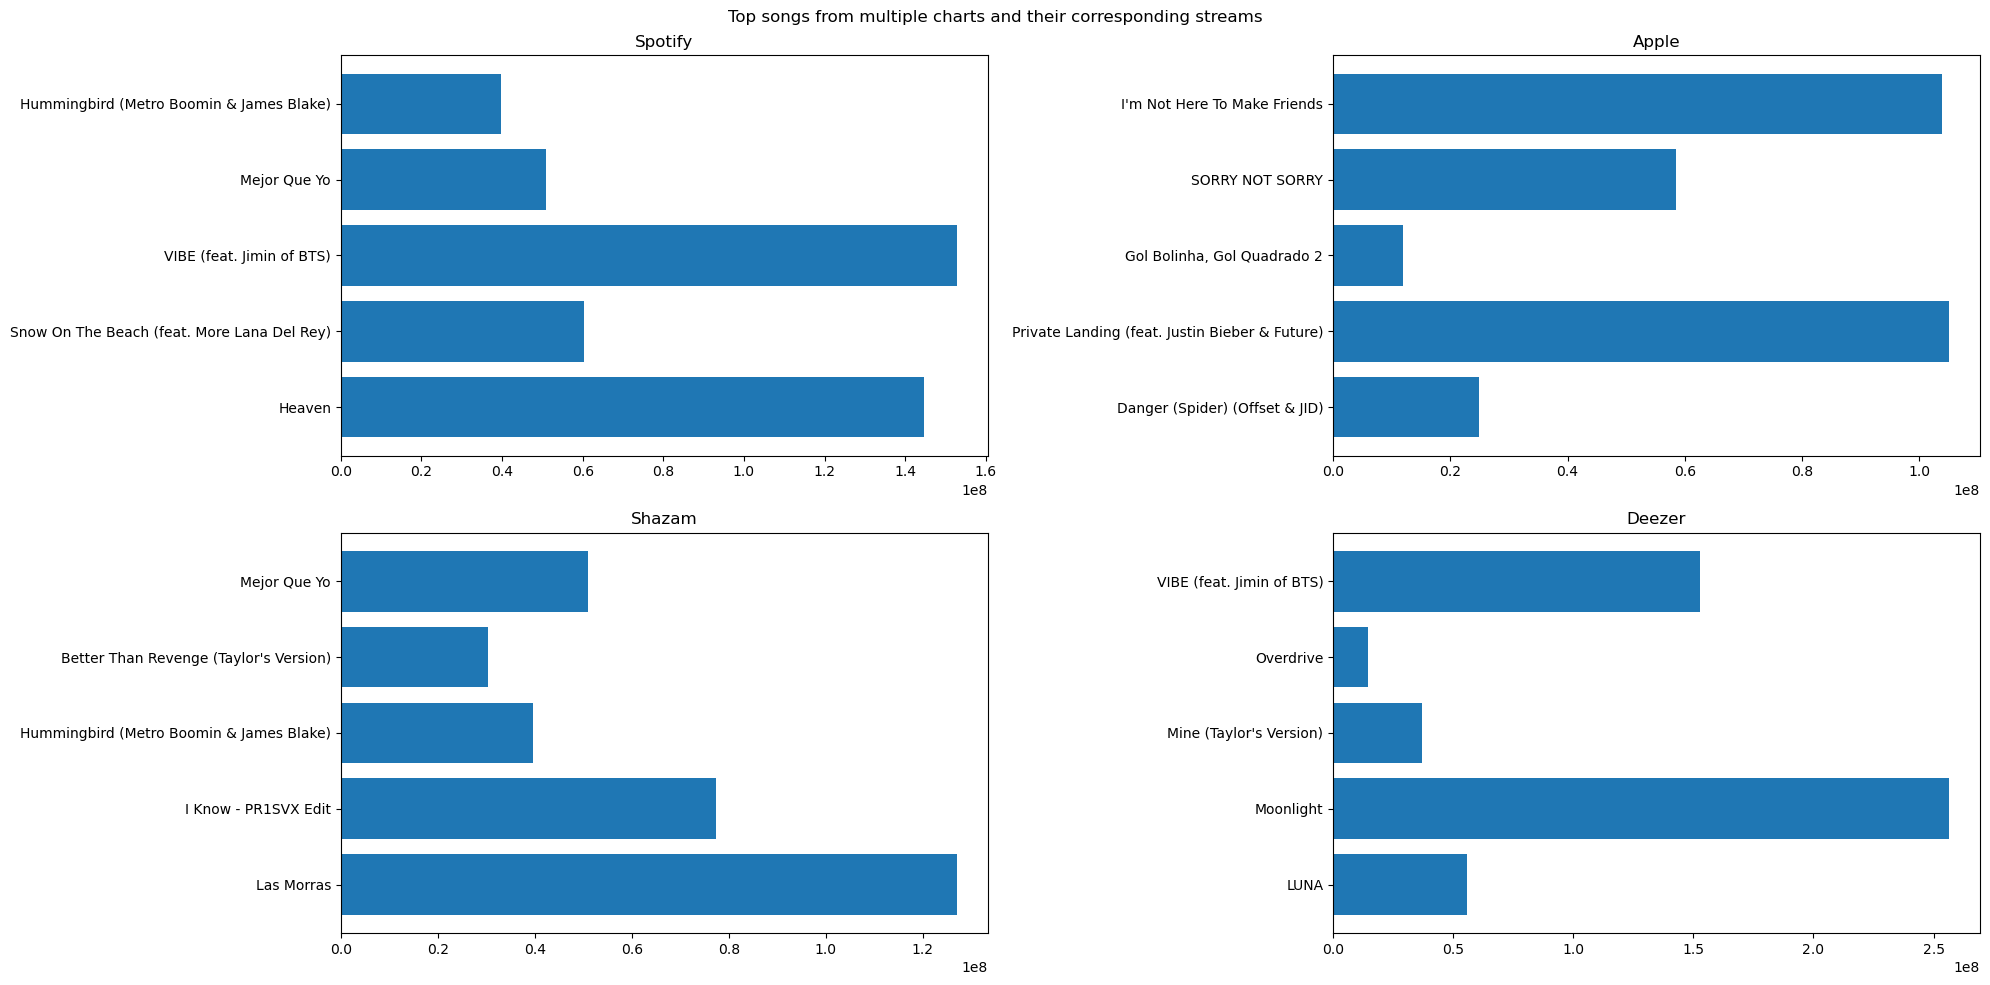

In [185]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0][0].barh(spotify_best_songs['track_name'][:5], spotify_best_songs['streams'][:5])
axes[0][0].invert_yaxis()
axes[0][0].set_title('Spotify')

axes[0][1].barh(apple_best_songs['track_name'][:5], apple_best_songs['streams'][:5])
axes[0][1].invert_yaxis()
axes[0][1].set_title('Apple')

axes[1][0].barh(shazam_best_songs['track_name'][:5], shazam_best_songs['streams'][:5])
axes[1][0].invert_yaxis()
axes[1][0].set_title('Shazam')

axes[1][1].barh(deezer_best_songs['track_name'][:5], deezer_best_songs['streams'][:5])
axes[1][1].invert_yaxis()
axes[1][1].set_title('Deezer')

fig.suptitle('Top songs from multiple charts and their corresponding streams')
plt.tight_layout()
plt.show();

 - Highest rank songs and their streams:

In [186]:
pd.concat([
  spotify_best_songs[:1][['track_name', 'streams']], apple_best_songs[:1][['track_name', 'streams']], shazam_best_songs[:1][['track_name', 'streams']],
  deezer_best_songs[:1][['track_name', 'streams']]
])

,track_name,streams
210,Hummingbird (Metro Boomin & James Blake),39666245.0
339,I'm Not Here To Make Friends,103787664.0
231,Mejor Que Yo,50847624.0
343,VIBE (feat. Jimin of BTS),152850295.0


- 📝 Comment:
  - Since the rank varies from year to year, the streams of some lower-rank songs higher than the other(For ex: Hummingbird have lower streams than the streams of VIBE). Reason is that in some year, the streams are very high. At the same time, number of songs released in that years also are remarkable. As a result, the rank of songs are very competitive and some songs even though the rank is low but the streams are very high.
  - Highest rank songs and their streams:
    1. Spotify: Hummingbird (Metro Boomin & James Blake) - 39666245.0
    2. Apple: I'm Not Here To Make Friends - 103787664.0
    3. Shazam: Mejor Que Yo - 50847624.0
    4. Deezer: VIBE - 152850295.0

- We will compare top 20 best songs from different charts to see how their streams different from the others

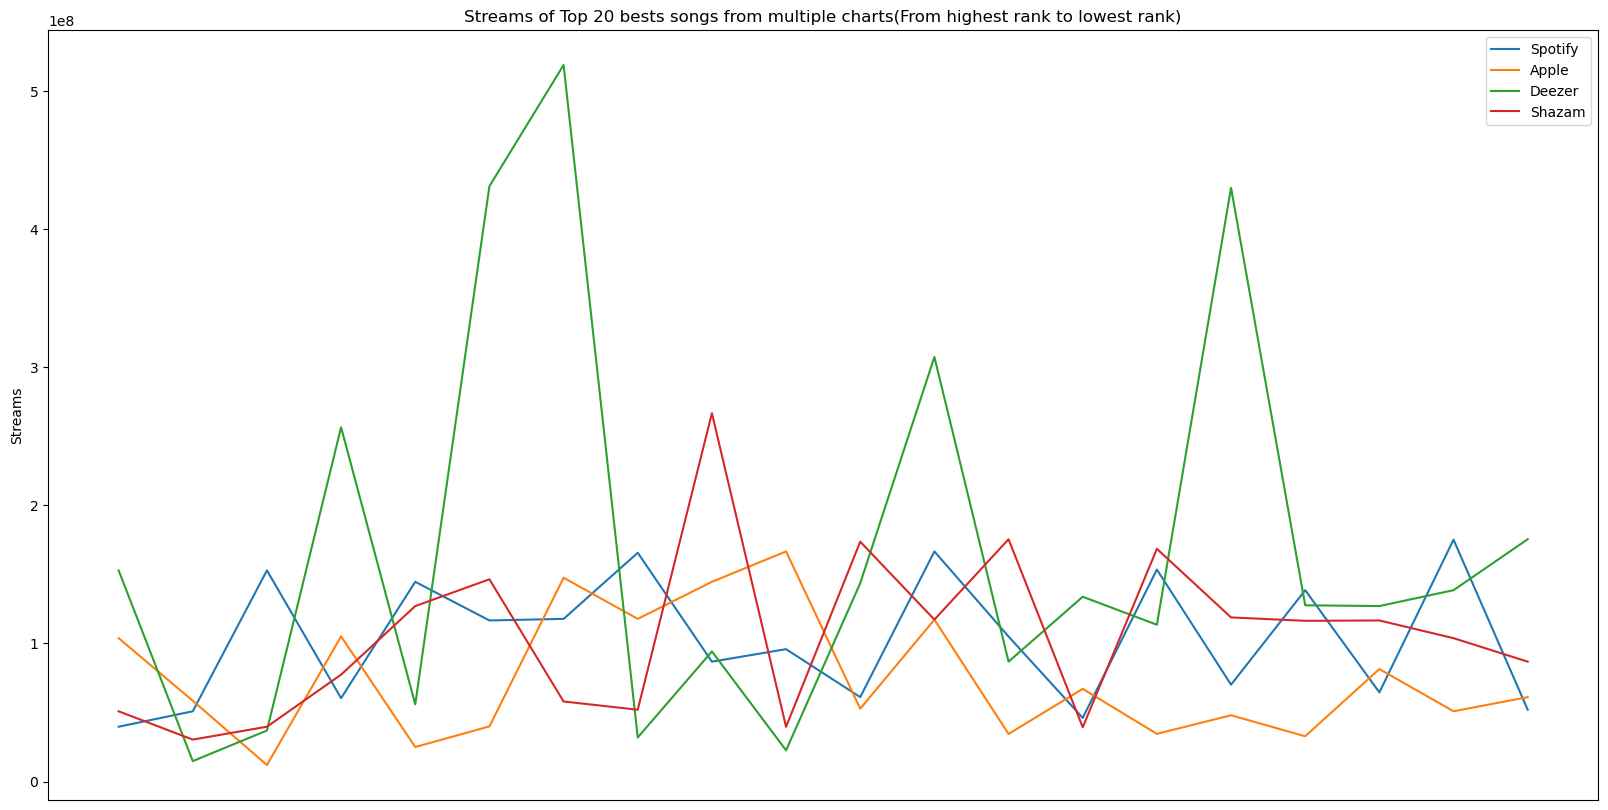

In [187]:
x = np.arange(1, 21)
plt.figure(figsize=(20, 10))

plt.plot(x, spotify_best_songs['streams'][:20], label='Spotify')
plt.plot(x, apple_best_songs['streams'][:20], label='Apple')
plt.plot(x, deezer_best_songs['streams'][:20], label='Deezer')
plt.plot(x, shazam_best_songs['streams'][:20], label='Shazam')

plt.title('Streams of Top 20 bests songs from multiple charts(From highest rank to lowest rank)')

plt.tick_params(bottom = False) 
plt.xticks([])
plt.ylabel("Streams")
plt.legend()
plt.show();

**✅ 3 best songs from `Deezer` charts which has the remarkable streams**

In [188]:
deezer_best_songs[:20].sort_values('streams', ascending=False)[:3].T

,46,120,26
track_name,Die For You - Remix,OMG,Last Night
artist(s)_name,"Ariana Grande, The Weeknd",NewJeans,Morgan Wallen
artist_count,2,1,1
released_year,2023,2023,2023
released_month,2,1,1
released_day,24,2,31
in_spotify_playlists,3408,1783,2420
in_spotify_charts,47.0,27.0,19.0
streams,518745108.0,430977451.0,429829812.0
in_apple_playlists,87,26,52


- 📝 Comments

  - Different platforms have different streams of bests songs. Some platforms the streams are more significant than the others(`Deezer`). 
  - We can see most of the streams take place in `Deezer`
  - The songs which has the highest rank does not mean that its stream will be the highest
  - There are 3 songs in `Deezer` have the most streams compare to the bests songs from other platforms: 

    1. Die For You - Remix
    2. OMG 
    3. Last Night

<i>**Top 10 songs that appear most frequently in Spotify, Apple and Deezer playlist**<i/>


C:\Users\Nien\AppData\Local\Temp\ipykernel_31064\2426515695.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[count//2][count%2].set_xticklabels(songs, rotation=30)
C:\Users\Nien\AppData\Local\Temp\ipykernel_31064\2426515695.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[count//2][count%2].set_xticklabels(songs, rotation=30)
C:\Users\Nien\AppData\Local\Temp\ipykernel_31064\2426515695.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[count//2][count%2].set_xticklabels(songs, rotation=30)
C:\Users\Nien\AppData\Local\Temp\ipykernel_31064\2426515695.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


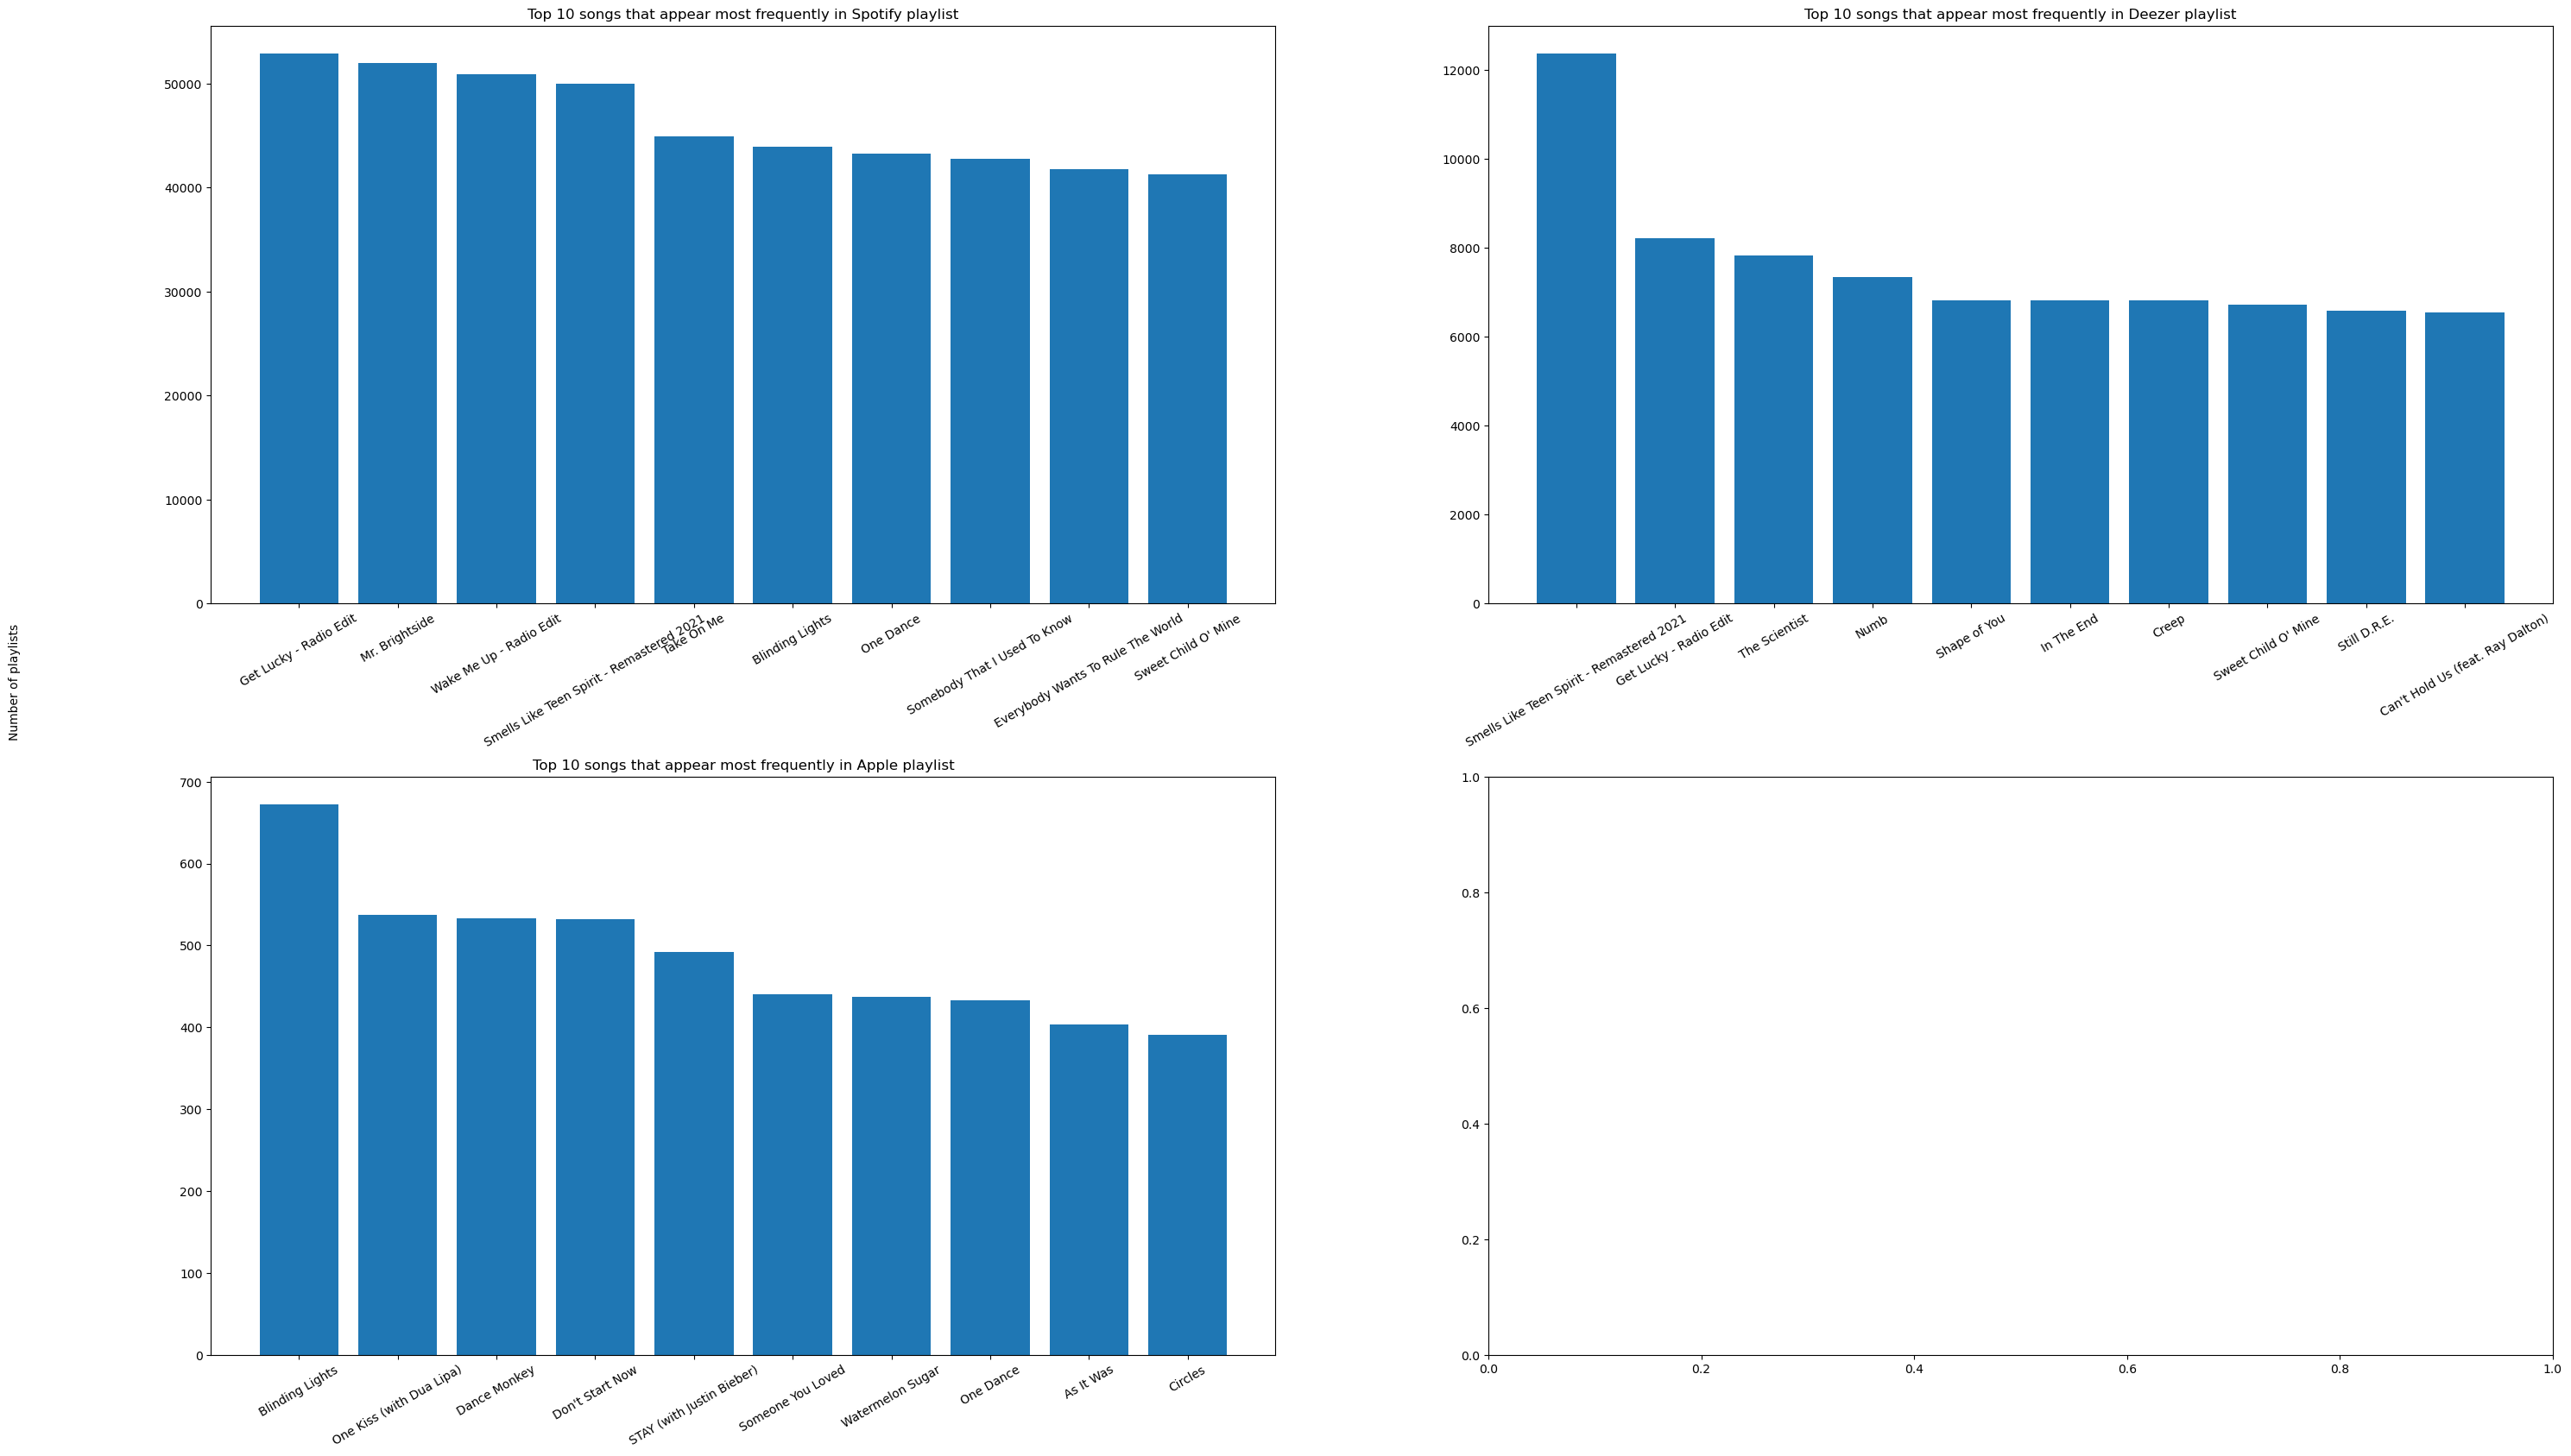

In [189]:
fig, axes = plt.subplots(2, 2, figsize=(35, 20))

platforms = ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']

count = 0
for platform in platforms:
  title = platform.split("_")[1]
  songs_df = df[['track_name', platform]].sort_values(by=platform, ascending=False)

  songs = songs_df['track_name']
  counts = songs_df[platform]
  axes[count//2][count%2].bar(songs[:10], counts[:10])
  axes[count//2][count%2].set_xticklabels(songs, rotation=30)
  axes[count//2][count%2].set_title('Top 10 songs that appear most frequently in ' + title.capitalize() + ' playlist')
  
  count += 1
fig.text(0.06, 0.5, 'Number of playlists', ha='center', va='center', rotation='vertical')

fig.subplots_adjust(hspace=0.3)
fig.show();

- 📝 Comment
  - People who using Deezer love listening to `Smells Like Teen Spirit`(we can see that number of playlist that include this song is very high compare to Top 2 and below)
  - The songs that included the most in `Spotify` playlists have the amount of playlists that are **extremely high** compare to `Apple`  

- ✅ Get 3 top songs most appear in playlist from Spotify

In [190]:
top_playlist_songs = df.sort_values(by='in_spotify_playlists', ascending=False)[:3]
top_playlist_songs.T

,670,562,639
track_name,Get Lucky - Radio Edit,Mr. Brightside,Wake Me Up - Radio Edit
artist(s)_name,"Pharrell Williams, Nile Rodgers, Daft Punk",The Killers,Avicii
artist_count,3,1,1
released_year,2013,2003,2013
released_month,1,9,1
released_day,1,23,1
in_spotify_playlists,52898,51979,50887
in_spotify_charts,0.0,15.0,34.0
streams,933815613.0,1806617704.0,1970673297.0
in_apple_playlists,203,306,315


📝 **Some insights**
- Some songs which is the most popular song in a year but its streams are very low compare to the best songs from the other years(**You Make It Fell Like Christmas, Pass The Dutchie or Sigue,...**)
- The streams is changing unexpectedly in some phases(**1982-1983, 1997-1998 and 2005-2007**). 
- The average streams of each years changing remarkably
- The best songs from different platform's chart(Spotify, Deezer, Apple or Shazam) have the streams that are very different. Especially in `Deezer`.
- The songs that appear most frequently in playlists of different platforms have the streams that are very noticeable. Especially in **Spotify** when compare to **Apple**   

**After analysing, now we will find some attributes of the best songs that we have found**

#### Find factors that makes the best songs

<i>**Take a quick glance at the attributes of the best songs that we have found from the previous section**</i>

1. Highest streams song
2. Song with highest streams of a year
3. Songs which create significant changing rate
4. Top 3 songs from each chart(Spotify, Deezer, Shazam, Apple)
5. Top 3 songs most appear in Spotify playlist

In [221]:
music_properties = ['bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

def get_song_properties(song):
  return song[music_properties]

best_songs_found = pd.concat([
  get_song_properties(highest_streams_song.T),
  get_song_properties(highest_streams_respected_year_songs),
  get_song_properties(significant_changing_rate_songs.T),
  get_song_properties(top_spotify_best_songs),
  get_song_properties(top_apple_best_songs),
  get_song_properties(top_deezer_best_songs),
  get_song_properties(top_shazam_best_songs),
  get_song_properties(top_playlist_songs),
])

best_songs_found

,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
52,171,C#,Major,50,38,80,0,0,9,7
2019,171,C#,Major,50,38,80,0,0,9,7
2017,96,C#,Minor,83,93,65,58,0,9,8
2018,110,C#,Major,50,45,41,75,0,11,3
1983,117,C#,Major,82,73,45,54,0,7,3
1998,156,B,Minor,32,49,72,0,0,9,4
2007,140,C,Major,52,20,85,0,0,7,5
210,81,F#,Major,59,26,60,46,1,25,13
231,178,C#,Minor,62,56,66,18,0,12,5
343,100,C,Major,79,60,68,7,0,26,4


<i>**Analysing at the distribution of best song's factors**</i>

C:\Users\Nien\AppData\Local\Temp\ipykernel_31064\1504783819.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


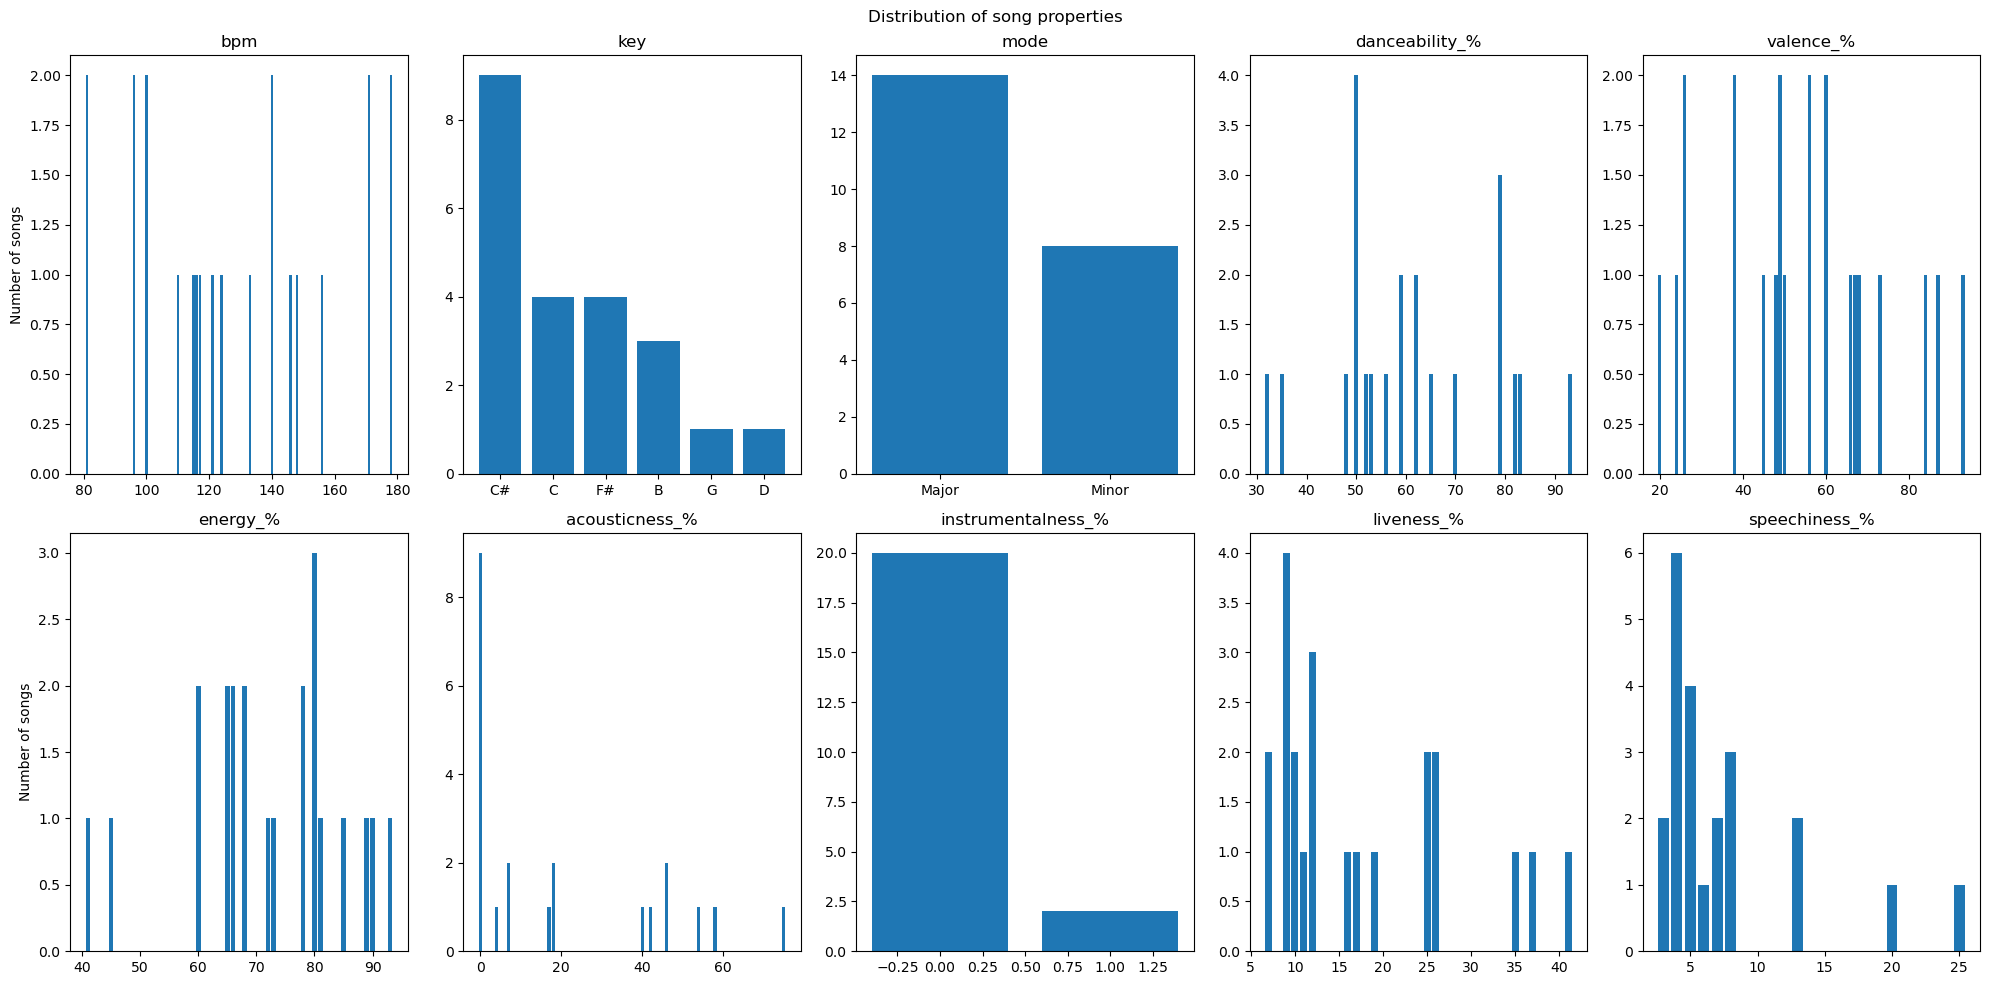

In [284]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

count = 0

distribution = {}

for col in best_songs_found.columns:
  value_counts = best_songs_found[col].value_counts()
  x = value_counts.index
  y = value_counts.values
  distribution.update({col: x[0]})

  axes[count//5][count%5].bar(x, y)
  axes[count//5][count%5].set_title(col)
  if count % 5 == 0 :
    axes[count//5][count%5].set_ylabel('Number of songs')
  
  count += 1

fig.suptitle('Distribution of song properties')
fig.tight_layout()
fig.show();

- Best values of each attributes

In [285]:
distribution

{'bpm': 171,
 'key': 'C#',
 'mode': 'Major',
 'danceability_%': 50,
 'valence_%': 38,
 'energy_%': 80,
 'acousticness_%': 0,
 'instrumentalness_%': 0,
 'liveness_%': 9,
 'speechiness_%': 4}

- 📝 Comment:
  - These are the best value from each factor of a song that worth notice:

    1. bpm: 171  
    2. Key: C#
    3. mode: Major
    4. danceability_%: 50
    5. valence_%: 38
    6. energy_%: 80
    7. acousticness_%: 0
    8. instrumentalness_%: 0
    9. liveness_%: 9
    10. speechiness_%: 4

  - With attributes from best songs that we have found, we can see that there are some values appear multiple times. Therefore, these value maybe valuable for composer or artists to consider in order to make a good song and make that song go to the top trending in no time.

### 2.3 Answer the question

- After all the efforts to analyze dataset and make some valuable insights from it. we come to a conclusion:
  - The best value of each attributes of a best song that we have found:
   
<center>

| Best factors      | Value |
|-------------------|-------|
| bpm               | 171   |
| key               | C#    |
| mode              | Major |
| danceability_%    | 50    |
| valence_%         | 38    |
| energy_%          | 80    |
| acousticness_%    | 0     |
| intrumentalness_% | 0     |
| liveness_%        | 9     |
| speechiness_%     | 4     |
</center>

  - From many figures that we have analysed and comment, there are some noticeable notes:
    1. Some songs are the best songs of a year but the streams are not very high
    2. The average streams of a song is a measure for us to have a general insight in a dataset. For further investigate, we have to use different statistics to work with(Ex: median,...)
    3. Each platforms have different users with various taste of music. The best songs from a platform may or may not be the best one in another platform
    4. There are some phases that the streams increase significantly(the changing rate is very high)
    5. Some platforms have the users that are very high compare to the others(the number of songs included in a playlist are very remarkable)

  - When we are trying to find the best value of a good song, we see that many best songs have quite similar music properties(key, bpm,...) 

  - With the best values that our team have found. We hope that this can help the composers/artists out there to be able to make their new songs become hits and top trending songs. 